<a href="https://colab.research.google.com/github/azriawi/Artificial-Intelligence-Project/blob/main/XRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving XRP-USD.csv to XRP-USD.csv


In [ ]:
#Store the data into a data frame 
df = pd.read_csv('XRP-USD.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,15/4/2020,0.185360,0.189266,0.181155,0.181270,0.181270,1963736221
1,16/4/2020,0.181254,0.191235,0.177414,0.190104,0.190104,2610251456
2,17/4/2020,0.181254,0.191235,0.189820,0.194925,0.190104,1912728846
3,18/4/2020,0.189911,0.195356,0.189820,0.194925,0.194925,1918245143
4,19/4/2020,0.195004,0.196344,0.190793,0.190859,0.190859,1904866741
5,20/4/2020,0.190821,0.194900,0.181831,0.183490,0.183490,2364973860


In [ ]:
#Get the number of trading days
df.shape

(366, 7)

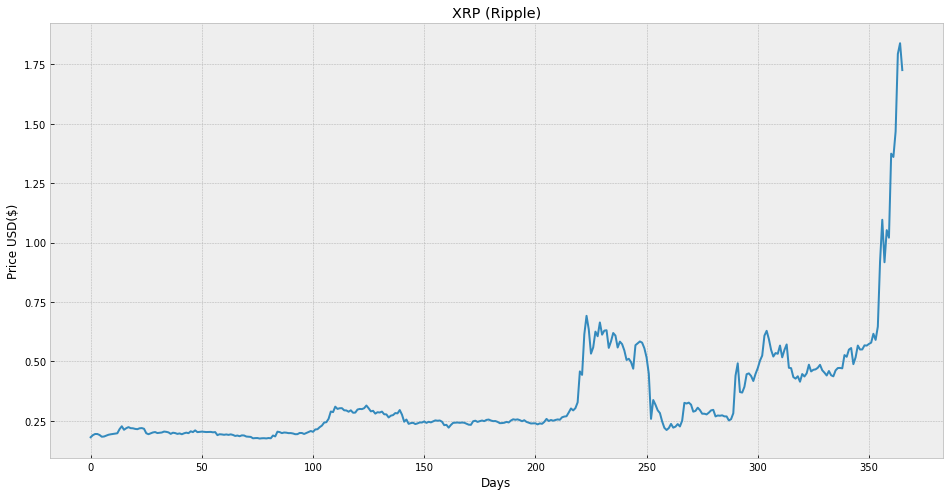

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('XRP (Ripple)')
plt.xlabel('Days')
plt.ylabel('Price USD($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,0.181270
1,0.190104
2,0.194925
3,0.194925


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
362,1.467735,NaN
363,1.794001,NaN
364,1.839236,NaN
365,1.726063,NaN


In [ ]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[0.18127 ]
 [0.190104]
 [0.194925]
 [0.194925]
 [0.190859]
 [0.18349 ]
 [0.184328]
 [0.18797 ]
 [0.191711]
 [0.193665]
 [0.195054]
 [0.196805]
 [0.197978]
 [0.215484]
 [0.227432]
 [0.212761]
 [0.219248]
 [0.223914]
 [0.219414]
 [0.218963]
 [0.216463]
 [0.21521 ]
 [0.218917]
 [0.219827]
 [0.216902]
 [0.198176]
 [0.194064]
 [0.197637]
 [0.20148 ]
 [0.203129]
 [0.198911]
 [0.200032]
 [0.201255]
 [0.205176]
 [0.204028]
 [0.201707]
 [0.195509]
 [0.200343]
 [0.198856]
 [0.195431]
 [0.197327]
 [0.193975]
 [0.197857]
 [0.200595]
 [0.198348]
 [0.20622 ]
 [0.202906]
 [0.210249]
 [0.202764]
 [0.203663]
 [0.204982]
 [0.204092]
 [0.203142]
 [0.203449]
 [0.203771]
 [0.202013]
 [0.202938]
 [0.19018 ]
 [0.193943]
 [0.193106]
 [0.191617]
 [0.193074]
 [0.191307]
 [0.193443]
 [0.190957]
 [0.18679 ]
 [0.1885  ]
 [0.18561 ]
 [0.189272]
 [0.18868 ]
 [0.184272]
 [0.18357 ]
 [0.182671]
 [0.176851]
 [0.177692]
 [0.177959]
 [0.17587 ]
 [0.176976]
 [0.177244]
 [0.176336]
 [0.177984]
 [0.177017]
 [0.188567]
 [0.

In [ ]:
#Create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' days/rows
y = np.array(df['Prediction'][:-future_days])
print(y)

[0.198176 0.194064 0.197637 0.20148  0.203129 0.198911 0.200032 0.201255
 0.205176 0.204028 0.201707 0.195509 0.200343 0.198856 0.195431 0.197327
 0.193975 0.197857 0.200595 0.198348 0.20622  0.202906 0.210249 0.202764
 0.203663 0.204982 0.204092 0.203142 0.203449 0.203771 0.202013 0.202938
 0.19018  0.193943 0.193106 0.191617 0.193074 0.191307 0.193443 0.190957
 0.18679  0.1885   0.18561  0.189272 0.18868  0.184272 0.18357  0.182671
 0.176851 0.177692 0.177959 0.17587  0.176976 0.177244 0.176336 0.177984
 0.177017 0.188567 0.184787 0.204692 0.20291  0.198652 0.201197 0.200538
 0.198575 0.198809 0.197111 0.194048 0.194281 0.199341 0.199135 0.195065
 0.198988 0.203342 0.207578 0.204049 0.214102 0.214982 0.223672 0.230277
 0.243099 0.244522 0.258904 0.289529 0.287062 0.30994  0.300493 0.303311
 0.303584 0.294664 0.294022 0.288653 0.294659 0.284449 0.28493  0.297807
 0.300371 0.299661 0.303492 0.314767 0.303307 0.290246 0.292573 0.280682
 0.286546 0.285386 0.289215 0.277927 0.277491 0.264

In [ ]:
#Split the data into 75% training and 25% testing 
x_train, x_test, y_train,y_test= train_test_split(X,y,test_size = 0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[0.549942],
       [0.556595],
       [0.488837],
       [0.517498],
       [0.567055],
       [0.550443],
       [0.550756],
       [0.567871],
       [0.566859],
       [0.573869],
       [0.579292],
       [0.616569],
       [0.590915],
       [0.646729],
       [0.920473],
       [1.096266],
       [0.917576],
       [1.052756],
       [1.020837],
       [1.374416],
       [1.36053 ],
       [1.467735],
       [1.794001],
       [1.839236],
       [1.726063]])

In [ ]:
#Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[0.441131 0.295438 0.567871 0.472417 0.4626   0.441131 0.441131 0.4626
 0.4626   0.236677 0.30558  0.58428  0.45296  0.283039 0.579163 0.579163
 0.579163 0.579163 0.579163 0.579163 0.579163 0.579163 0.579163 0.579163
 0.579163]

[0.55642156 0.56171818 0.50777437 0.5305921  0.57004564 0.55682042
 0.55706961 0.57069528 0.5698896  0.57547043 0.57978782 0.60946495
 0.58904117 0.63347607 0.8514104  0.99136353 0.84910402 0.95672414
 0.93131264 1.21280558 1.20175059 1.28709913 1.54684751 1.5828602
 1.4927604 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


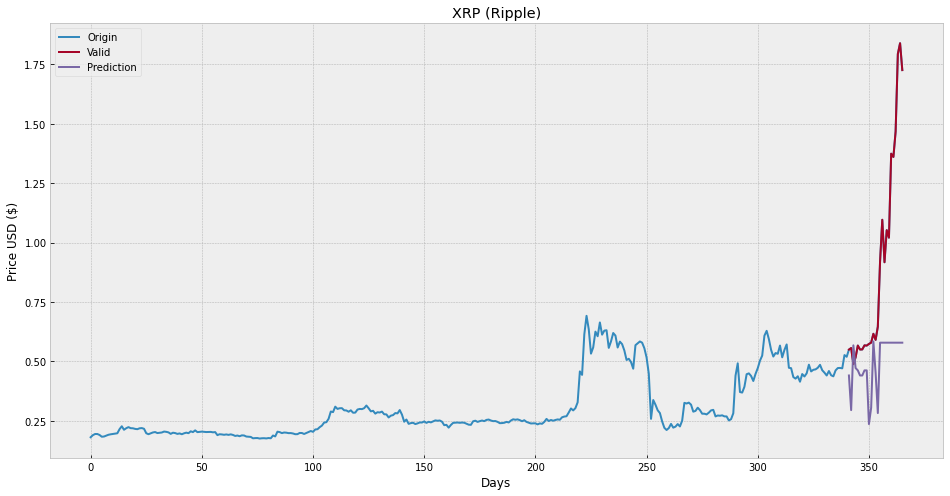

In [ ]:
#Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('XRP (Ripple)')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Valid', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


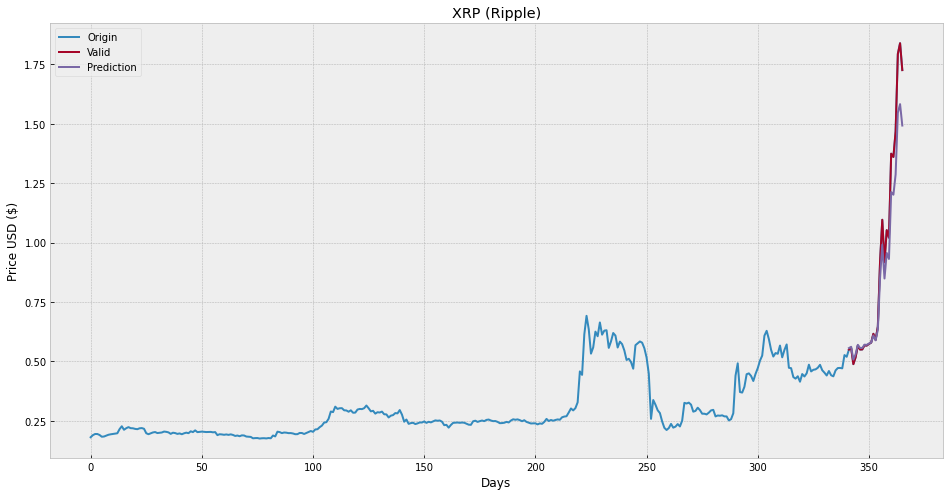

In [ ]:
#Visualize the data
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('XRP (Ripple)')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Valid', 'Prediction'])
plt.show()